In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver

# Problem Definition

In [5]:
# Simple Decay
# http://www.sosmath.com/diffeq/first/application/radioactive/radioactive.html

r = 2
def f(t, y):
    # dQ/dt = -rQ
    return [-r*y[0]]

t = np.linspace(0, 5, 50).reshape(-1, 1) #training points
y0_list = [10] 

# Reference solution

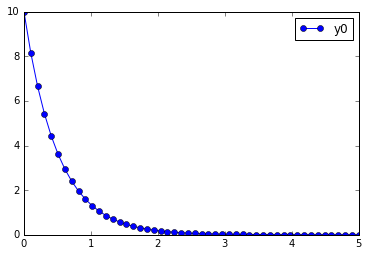

In [6]:
# reference solution using scipy package
sol = solve_ivp(f, [t.min(), t.max()], y0_list, 
                t_eval=t.ravel(), method='Radau', rtol=1e-5)
plt.plot(sol.t, sol.y[0], marker='o', label='y0')
#plt.plot(sol.t, sol.y[1], marker='o', label='y1')
plt.legend()

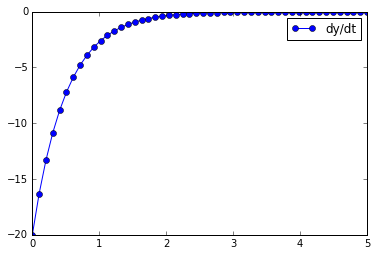

In [8]:
# reference solution using scipy package
plt.plot(sol.t, f(sol.t, sol.y)[0], marker='o', label='dy/dt')
#plt.plot(sol.t, f(sol.t, sol.y)[1], marker='o', label='dy/dt')
plt.legend()

# Neural Net Training

In [10]:
nn = NNSolver(f, t, y0_list, n_hidden=100)
nn

Neural ODE Solver 
Number of equations:       1 
Initial condition y0:      [10] 
Numnber of hidden units:   100 
Number of training points: 50 

In [11]:
nn.reset_weights()
%time nn.train(maxiter=1000, iprint=100)

iteration: 0 loss:  296.117897222
iteration: 100 loss:  1.23457062039e-06
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 180
         Function evaluations: 211
         Gradient evaluations: 211
CPU times: user 2.75 s, sys: 51.2 ms, total: 2.8 s
Wall time: 1.9 s


# Verifying training set

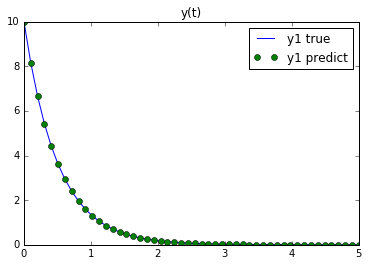

In [13]:
y_pred_list, dydt_pred_list = nn.predict()
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

#plt.plot(sol.t, sol.y[1], label='y2 true')
#plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
#plt.xlim((0, 3))
plt.title('y(t)')


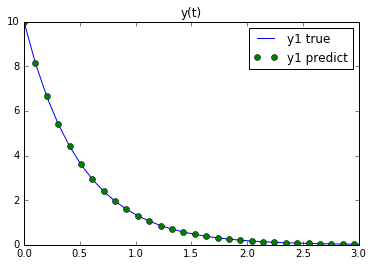

In [14]:
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

#plt.plot(sol.t, sol.y[1], label='y2 true')
#plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.xlim((0, 3))
plt.title('y(t)')

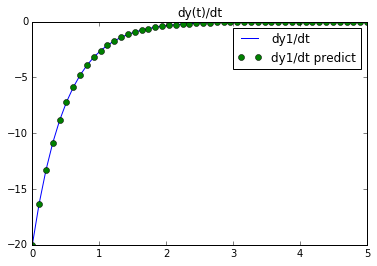

In [15]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, f(sol.t, sol.y)[0], label='dy1/dt')
plt.plot(t, dydt_pred_list[0], 'o', label='dy1/dt predict')

#plt.plot(sol.t, f(sol.t, sol.y)[1], label='dy2/dt')
#plt.plot(t, dydt_pred_list[1], 'o', label='dy2/dt predict')

plt.legend()
plt.title('dy(t)/dt')